In [2]:
import requests 
import pandas as pd
import numpy as np
import sys; sys.path
import datetime
import pandas as pd
import numpy as np 
from datetime import datetime
from datetime import datetime
from tqdm import tqdm
import random
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

from bitcoin_deep_learning.call_api import ApiCall
from bitcoin_deep_learning.model import LinearRegressionBaselineModel, RnnDlModel,RandomForestReg
from bitcoin_deep_learning.trainer import cv_train, read_result
from bitcoin_deep_learning.cross_val import cross_val, get_cross_XY, cross_val_trade
api = ApiCall()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#df = ApiCall().get_clean_data()
#ApiCall().data_to_csv(df)
#ApiCall().save_train_val_test_split(df)


In [ ]:
df = ApiCall().read_local(data="all")
df.shape

In [ ]:
model = LinearRegressionBaselineModel()
val_score, score = train(model,train_df)
np.array(val_score).argmax()

In [ ]:
plt.plot(val_score)
score



In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_df["[+]_[T]_Bitcoin_Price"].iloc[0:260])

In [ ]:
(X_train_list, Y_train_list, X_test_list,Y_test_list) = get_cross_XY(data="train")


In [ ]:
model = LinearRegressionBaselineModel(alpha=5,l1_ratio=0.01)
#model = LinearRegressionBaselineModel(alpha=50,l1_ratio=0.01)
fold_score,score = train(model,train_df)


In [ ]:
df = read_result()
df.sort_values(by="mean_score",ascending=True)

In [ ]:
#index = np.array(fold_score).argmax()
#model = LinearRegressionBaselineModel(alpha=0.1,l1_ratio=0.001)
#model = LinearRegressionBaselineModel(alpha=50,l1_ratio=0.01)
from bitcoin_deep_learning.model import RandomForestReg
model = RandomForestReg()
#model = LinearRegressionBaselineModel(alpha=0.1,l1_ratio=0.001)
(X_train_list, Y_train_list, X_test_list,Y_test_list) = get_cross_XY(data="train")
scores = []
for index in range(len(X_train_list)):
    print("FOLD ",index)
    model.set_model()
    fold_score,score = train(model,train_df)
    X_test = X_test_list[index]
    X_train = X_train_list[index]
    Y_test = Y_test_list[index]
    Y_train = Y_train_list[index]
    Y_pred = model.run(X_test,X_train,Y_train)
    score = mean_absolute_error(Y_pred,Y_test)
    print("Average mae is ",score)
    scores.append(score)
    plt.plot(Y_test)
    plt.plot(Y_pred,color="r")
    plt.show()
    Y_pred.mean()


In [ ]:
model = RandomForestReg()
(X_train_list, Y_train_list, X_test_list,Y_test_list) = get_cross_XY(data="train")
scores1 = []
for index in range(len(X_train_list)):
    print("FOLD ",index)
    model.set_model()
    fold_score,score = train(model,train_df)
    X_test = X_test_list[index]
    X_train = X_train_list[index]
    Y_test = Y_test_list[index]
    Y_train = Y_train_list[index]
    Y_pred = model.run(X_test,X_train,Y_train)
    score = mean_absolute_error(Y_pred,Y_test)
    print("Average mae is ",score)
    scores1.append(score)
    plt.plot(Y_test)
    plt.plot(Y_pred,color="r")
    plt.show()
    print("Y_test mean",Y_test.mean(),"std dev",Y_test.std())
    print("Y_pred mean",Y_pred.mean(),"std dev",Y_pred.std())
print(score1)

In [ ]:
Y_pred

In [ ]:
index = random.randint(0,32)
X_test = X_test_list[index]
X_train = X_train_list[index]
Y_test = Y_test_list[index]
Y_train = Y_train_list[index]
Y_pred = model.run(X_test,X_train,Y_train)

In [ ]:
X_train.shape

In [ ]:
import seaborn as sns
X_train = X_train_list[0]
plt.plot(X_train[1,:,]);
#plt.plot(Y_train)

In [ ]:
plt.plot(train_df["[+]_[T]_Bitcoin_Price"].iloc[0:260])

In [ ]:
index = 0
X_test = X_test_list[index]
X_train = X_train_list[index]
Y_test = Y_test_list[index]
Y_train = Y_train_list[index]
Y_pred = model.run(X_test,X_train,Y_train)
from bitcoin_deep_learning.model import RnnDlModel
model = RnnDlModel(epochs=2)
Y_pred = model.run(X_test,X_train,Y_train)

In [ ]:
train_df = ApiCall().read_local()
train_df

In [ ]:
train_df = ApiCall().read_local(data="train")
train_df.head(20)

In [ ]:
train_df.iloc[0:260,:].head(20)

In [ ]:
X_train = X_train_list[0]

In [ ]:
X_seq0= X_train[0,:,:]
plt.plot(X_seq0[:,-1])

In [ ]:
plt.plot(train_df["[+]_[T]_Bitcoin_Price"].iloc[0:90])

In [ ]:
plt.plot(train_df["[%]_Bitcoin_growth_rate_on_Horizon=1"].iloc[0:90])

In [ ]:
X_train[0,:,:]

In [ ]:
np.random.shuffle(X_train)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_df["[%]_Bitcoin_growth_rate_on_Horizon=1"])

In [ ]:
import math

In [ ]:
plt.plot(train_df["[+]_[T]_Bitcoin_Price"])

In [ ]:
plt.plot(np.log(np.log(train_df["[+]_[T]_Bitcoin_Price"])))

In [ ]:
plt.plot(np.log(np.log(train_df["[+]_[T]_Bitcoin_Price"])))

In [ ]:
model = RnnDlModel()
(X_train_list, Y_train_list, X_test_list,Y_test_list) = get_cross_XY(data="train")
Y_pred = model.run(X_test_list[0],X_train_list[0],Y_train_list[0])

In [ ]:
Y_pred

In [ ]:
read_result().sort_values(by="name",ascending=False)

In [ ]:
model = RandomForestReg()
train(model,train_df)

In [ ]:
model = RandomForestReg()
train(model,train_df)

In [ ]:
HORIZON =7
def cross_val(model, df,
              verbose:int=0,
              saving:bool=False,
              metrics=[],
              trader_metrics=[],
              hyperparams=None):
    '''Compute and process a complete cross validation of a given model,
    taking personalised metrics into account
    params :
    verbose range from 0 to 10 and allow to print a few informations during the
        process
    return reality, prediction '''
    df = df.drop(columns=["date"])
    # Initializing the variable to return
    prediction_diff, past_reality, reality,reality_diff, prediction = [], [], [], [], []
    # Setting the indexes to cut the df into folds
    start_fold_train, end_fold_train, start_fold_test, end_fold_test = fold_indexes(
        df=df,verbose=verbose)
    # Starting the iteration on folds
    for i in range(len(start_fold_train))[:1]:
        # reinitialise the model between two folds to reset training
        model.set_model()
        # instantiating train fold
        if verbose >= 10 :
            print("Creating sequences in the train_fold")
        print(start_fold_test[0],end_fold_test[0])
        train_fold_df = df.loc[start_fold_train[i]:
                                 end_fold_train[i]].copy().reset_index(drop=True)
        # Setting the indexes to cut the train_fold in regular sequences and targets
        sequence_starts, sequence_stops, target_idx = sequence_indexes(
            df=train_fold_df,verbose=verbose)
        # Initializing the X_train, Y_train
        X_train, Y_train = [], []
        # Starting the iteration on the sequences to create X,Y_train
        for j in range(len(sequence_starts)):

            X_train_seq = np.array(
                train_fold_df.iloc[sequence_starts[j]:sequence_stops[j]])
            y_train = train_fold_df.iloc[target_idx[j], -1]
            #Converting the little df to np array
            X_train.append(np.array(X_train_seq))
            Y_train.append(np.array(y_train))
        # Converting the list of array to an array
        Y_train = np.array(Y_train)
        X_train = np.array(X_train)

        #Same process as ahead but on the test_fold
        test_fold_df = df.loc[start_fold_test[i]:end_fold_test[i]].copy(
        ).reset_index(drop=True)
        sequence_starts, sequence_stops, target_idx = sequence_indexes(df=test_fold_df,verbose=verbose)
        Y_test,X_test,Y_true_price = [],[],[]
        print(test_fold_df.shape)
        for j in range(len(sequence_starts)):
            X_test_seq = test_fold_df.iloc[sequence_starts[j]:sequence_stops[j]]
            y_test = test_fold_df.iloc[target_idx[j], -1]
            y_true_price_past = test_fold_df.iloc[target_idx[j]-HORIZON, -2]
            y_true_price = test_fold_df.iloc[target_idx[j], -2]
            
            print(target_idx[j])
            #y_true_price_minus_horizon = test_fold_df.iloc[target_idx[j], -2]
            X_test.append(np.array(X_test_seq))
            Y_true_price_past.append(y_true_price_past)
            Y_true_price.append(y_true_price)
            Y_test.append(np.array(y_test))
            
        Y_test = np.array(Y_test)
        Y_true_past = np.array(Y_true_price_past)
        Y_true = np.array(Y_true_price)
        X_test = np.array(X_test)
        # Now we have an X_test,Y_test , X_train,Y_train ready to be processed

        #TODO SHUFFLING THE X,y
        Y_pred = model.run(X_test,X_train, Y_train)

        # Keeping these lines in case we want to use Y_test, Y_pred in the futur
        prediction_diff.append(Y_pred)
        reality_diff.append(Y_test)
        past_reality.append(Y_true_past)
        reality.append(Y_true)
    
    # NOTA BENE PAST_REALITY HERE IS {HORIZON DAYS BEHIND REALITY}
    return past_reality, reality,reality_diff, prediction

In [ ]:
pastreality, reality_diff, prediction, test_fold_df = cross_val(model,train_df)

In [ ]:
test_fold_df["[+]_[T]_Bitcoin_Price"].iloc[89:].head(20)

In [ ]:
reality[0][0]

In [ ]:
reality, reality_diff, prediction, test_fold_df = cross_val(model,train_df)

In [ ]:
test_fold_df["[%]_Bitcoin_growth_rate_on_Horizon=7"].iloc[89:].head(20)

In [ ]:
reality

In [ ]:
from bitcoin_deep_learning.cross_val import cross_val_trade

In [ ]:
df = ApiCall().read_local(data="test")
model = LinearRegressionBaselineModel()

In [ ]:
Y_true_past, Y_true, Y_test, Y_pred = cross_val_trade(model,df,cv=False,verbose=True)

In [ ]:
model = LinearRegressionBaselineModel()
Y_true_past, Y_true, Y_diff_test, Y_pred = cross_val_trade(model,df,cv=False,verbose=True)
fig,axs = plt.subplots(2,1)
axs[0].plot(Y_test)
axs[0].plot(Y_pred, c= "r")
plt.show
axs[1].plot(Y_true)
axs[1].plot(Y_true_past + Y_true_past* Y_pred, c= "r")

In [ ]:
model = RandomForestReg(n_estimators=1500)
Y_true_past, Y_true, Y_test, Y_pred = cross_val_trade(model,df,cv=False,verbose=True)
fig,axs = plt.subplots(2,1)
axs[0].plot(Y_test)
axs[0].plot(Y_pred, c= "r")
plt.show
axs[1].plot(Y_true)
axs[1].plot(Y_true_past + Y_true_past* Y_pred, c= "r")

In [ ]:
train_df = ApiCall().read_local(data='train')

In [ ]:
for warm_start in  [True,False]:
    for max_features in ["auto", "sqrt", "log2"]:
        for bootstrap in [True,False]:
            for criterion in ["squared_error", "absolute_error", "poisson"]:
                    for max_depth in [None,True]:
                        if max_depth :
                            max_depht = np.random.randint(1,1000)
                        print("oui")
                        min_samples_split = random.randint(2,100)
                        min_samples_leaf = random.randint(2,100)
                        model = RandomForestReg(warm_start=warm_start,
                                               max_features=max_features,
                                               bootstrap=bootstrap,
                                               criterion=criterion,
                                               max_depth=max_depth,
                                               min_samples_split=min_samples_split,
                                               min_samples_leaf=min_samples_leaf)

                        cv_train(model,train_df)

In [ ]:
read_result().sort_values(by="date")

In [3]:
from bitcoin_deep_learning.metrics import plot_portolio_positions


[45147.4403589  46082.23150321 45004.70197422 47031.16732364
 48143.03744946 47799.18503883 47204.66266011 48234.21547367
 47257.28704222 42907.06576746 40633.93433534 43569.17620057
 44890.04746965 42796.24321533 42746.97922403 43247.45687647
 42248.01771774 41032.26192918 41538.28298802 43750.87179862
 48118.17770595 47756.25428304 48220.65303747 49080.66909232
 51559.36204422 55431.02700201 53776.54287093 53884.29053319
 55068.64354562 54675.09321531 57434.24099024 56064.76997698
 57377.79917694 57354.32086331 61571.09490522 60890.14283084
 61640.37510539 61975.54697315 64238.2711078  65996.56616789
 62385.16707125 60703.42954102 61342.90825482 60881.94756487
 62967.41302302 60449.35530261 58639.68046139 60572.27124398
 62234.03101143 61735.37066984 61366.99988157 61058.22626538
 63176.57178532 62999.12240391 61434.6328169  61121.31052073
 61493.66389711 63252.42476178 67589.00657928 66945.69883397
 64818.21602921 64816.13453057 64282.43806051 64468.22210883
 65342.41990216 63743.39

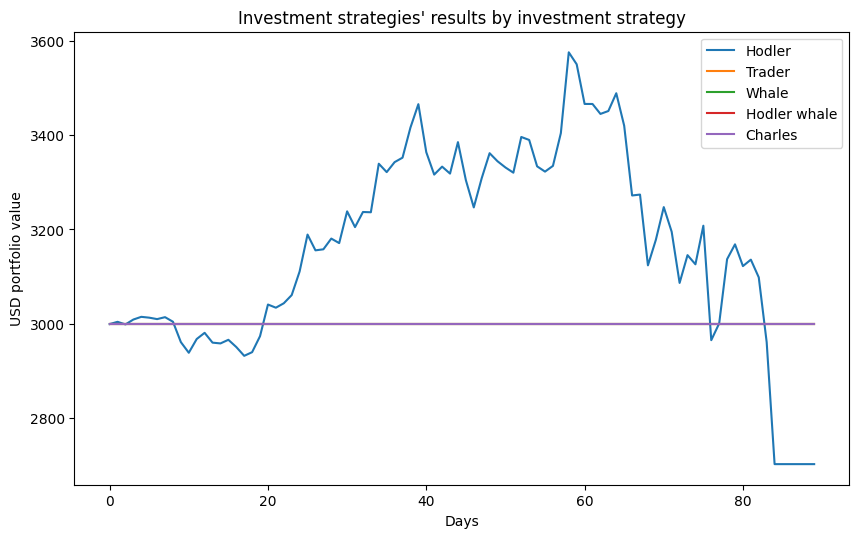

In [6]:
plot_portolio_positions(fold = 0, model = RandomForestReg(),
                        df = ApiCall().read_local(data = 'train'))

Epoch 1/2
17/17 [==============================] - 12s 358ms/step - loss: 1.5618 - mae: 0.0724 - val_loss: 1.5134 - val_mae: 0.0798
Epoch 2/2
17/17 [==============================] - 5s 309ms/step - loss: 1.4605 - mae: 0.0724 - val_loss: 1.4466 - val_mae: 0.0891
[47262.237443   49354.08716868 50118.92095928 46762.48252806
 48413.70564739 48819.84934723 47695.2803949  46326.9195957
 46962.91334059 46791.89605595 46853.71063455 48957.19391098
 48646.43337567 50770.61418965 50864.32895235 50649.92614866
 50806.44217533 50610.95680294 47669.74037208 46407.59548964
 47188.32055009 46328.94313809 47620.42381093 47344.84340974
 46467.61579525 45926.76178657 43589.35568307 43154.45522485
 41564.23901044 41744.05783199 41910.51226779 41820.01786922
 42721.69548372 43935.64398491 42596.12337644 43101.33599626
 43198.86986181 43122.78741443 42235.1848487  42372.5532734
 41731.94792084 40706.93154832 36440.2657686  35036.9447362
 36254.87985724 36656.19382217 36946.23828322 36851.36987997
 37148.3

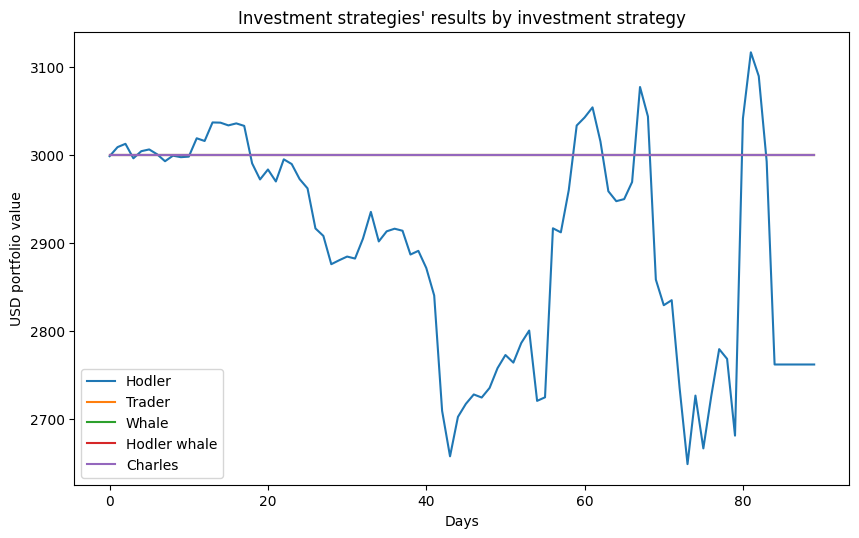

In [5]:
plot_portolio_positions(fold = 0, model = RnnDlModel(epochs=2,patience=1),
                            df = ApiCall().read_local(data = 'all'),
                                                      cv = False,
                                                      verbose = 0)

/Users/Zalo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.908e+00, tolerance: 1.509e-03
  model = cd_fast.enet_coordinate_descent(


[47262.237443   49354.08716868 50118.92095928 46762.48252806
 48413.70564739 48819.84934723 47695.2803949  46326.9195957
 46962.91334059 46791.89605595 46853.71063455 48957.19391098
 48646.43337567 50770.61418965 50864.32895235 50649.92614866
 50806.44217533 50610.95680294 47669.74037208 46407.59548964
 47188.32055009 46328.94313809 47620.42381093 47344.84340974
 46467.61579525 45926.76178657 43589.35568307 43154.45522485
 41564.23901044 41744.05783199 41910.51226779 41820.01786922
 42721.69548372 43935.64398491 42596.12337644 43101.33599626
 43198.86986181 43122.78741443 42235.1848487  42372.5532734
 41731.94792084 40706.93154832 36440.2657686  35036.9447362
 36254.87985724 36656.19382217 36946.23828322 36851.36987997
 37148.32227909 37789.47882002 38137.47269687 37936.32877744
 38455.68966346 38784.50229871 36924.10239442 37018.58700268
 41516.07281916 41421.47643291 42411.10429027 43921.96437825
 44110.31669061 44347.12092966 43548.07188871 42407.68766215
 42198.7514316  42242.10014

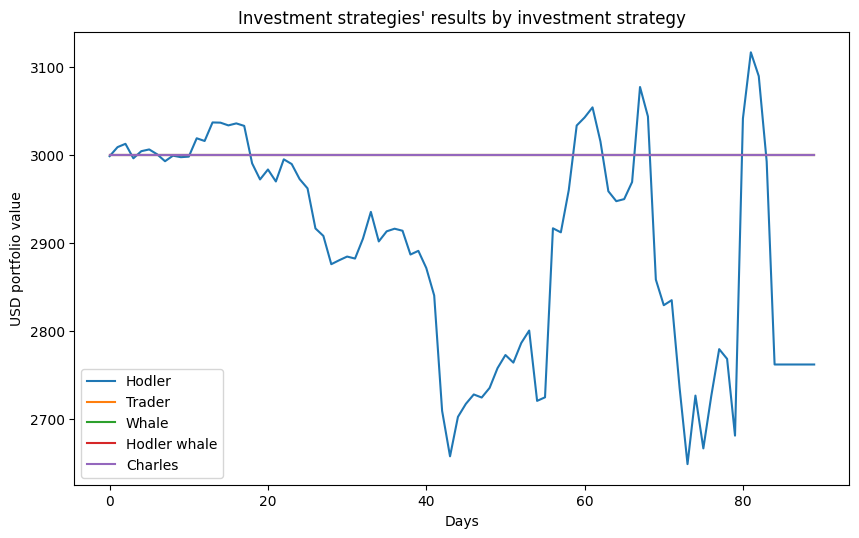

In [8]:
plot_portolio_positions(fold = 0, model = LinearRegressionBaselineModel(),
                            df = ApiCall().read_local(data = 'all'),
                                                      cv = False,
                                                      verbose = 0)

In [ ]:
from bitcoin_deep_learning.mod

In [ ]:
past_realities1, realities1, realities_diff1, prediction_diff1 = cross_val_trade(model=LinearRegressionBaselineModel(), df = ApiCall().read_local(data = 'all'), 
                                                                                              cv=False, verbose=0)
                                                                             

In [ ]:
past_realities1

In [4]:
past_realities, realities, realities_diff, prediction_diff = cross_val_trade(model=RnnDlModel(epochs=2,patience=2), df = ApiCall().read_local(data = 'all'), 
                                                                                              cv=False, verbose=0)
                                                                             

Epoch 1/2
17/17 [==============================] - 14s 361ms/step - loss: 1.5207 - mae: 0.0739 - val_loss: 1.4707 - val_mae: 0.0802
Epoch 2/2
17/17 [==============================] - 6s 344ms/step - loss: 1.4184 - mae: 0.0725 - val_loss: 1.3885 - val_mae: 0.0815


In [ ]:
past_realities[0].shape

In [ ]:
prediction_diff[0].shape

In [ ]:
preds_arr = []
for past_prices, diffs in zip(past_realities,prediction_diff):
    print
    preds_arr.append(past_prices * diffs.reshape(1,-1) + past_prices )

preds_arr[0]

In [ ]:
prediction_diff[0]

In [ ]:
preds_arr[0]

In [ ]:
portfolio_positions_hodler = []
portfolio_positions_trader = []
portfolio_positions_whale = []
portfolio_positions_hodler_whale = []
portfolio_positions_charles = []

In [ ]:
from bitcoin_deep_learning.metrics import play_hodler_strategy,play_trader_strategy

In [ ]:
portfolio_positions_hodler = []
portfolio_positions_trader = []
portfolio_positions_whale = []
portfolio_positions_hodler_whale = []
portfolio_positions_charles = []
for reality, prediction in zip(realities, preds_arr):
    y_true, y_pred = reality, prediction
    play_trader_strategy(y_true,y_pred)
    for values in list(y_true):
        print(type(float(values)))